In [2]:
import kagglehub
import os

path = kagglehub.dataset_download("mujtabamatin/air-quality-and-pollution-assessment")
file = os.listdir(path)
print("Path to dataset files:", path) # 파일 경로 확인
print("Files in dataset directory:", file) # 파일명 확인

csv_path = os.path.join(path, file[0])

c:\Users\82108\anaconda3\envs\ohio\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\82108\.cache\kagglehub\datasets\mujtabamatin\air-quality-and-pollution-assessment\versions\2
Files in dataset directory: ['updated_pollution_dataset.csv']


#### 라이브러리

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(csv_path)

#### Key Features:

Temperature (°C) - 평균기온: Average temperature of the region.   
Humidity (%) - 습도: Relative humidity recorded in the region.   
PM2.5 Concentration (µg/m³) - 초미세먼지: Fine particulate matter levels.   
PM10 Concentration (µg/m³) - 미세먼지: Coarse particulate matter levels.   
NO2 Concentration (ppb) - 이산화질소: Nitrogen dioxide levels.   
SO2 Concentration (ppb) - 이산화황: Sulfur dioxide levels.   
CO Concentration (ppm) - 일산화탄소소: Carbon monoxide levels.   
Proximity to Industrial Areas (km) - 산업단지 근접도: Distance to the nearest industrial zone.   
Population Density (people/km²) - 인구밀도: Number of people per square kilometer in the region.   

### EDA

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


- 모든 행 not null
- pm10, so2 음수값 존재
- target: air_quality

In [6]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [9]:
df["Air Quality"].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

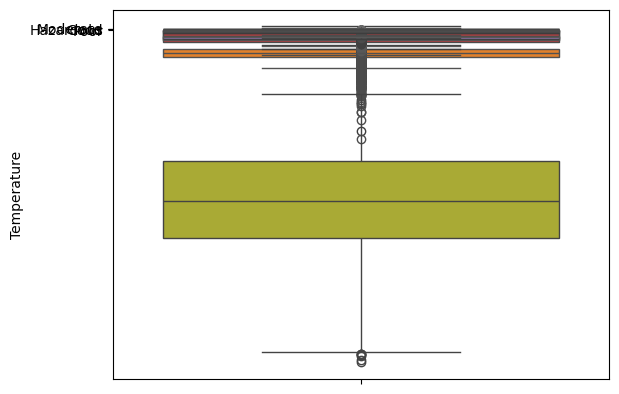

In [7]:
for col in df.columns :
    sns.boxplot(df[col])